# Scenario
* You are tasked with investigating customer churn
    * churn: when a customer quits a service.  High churn rate = bad for business.
* in the `data/` folder is a the dataset you will be working on. 


# Complete the following
* Find features that are high indicators of churn and build visualizations
* Build a model to predict churn. You can build any model you want including
    * Logistic Regression 
    * KNN
    * Bayesian Classifiers
* Choose an evaluation metric for your model
    * Accuracy vs Precision vs Recall vs F1
* Explain why you chose that Metric
* Apply a GridsearchCV to find the best hyper parameters for your model
* After you build your final model you must have
    * A confusion matrix supporting your model
    * Final Metric Score
* Make sure you have a validation set for your data


# Can you
* Work in groups? Yes
* Ask cohort-mates for help/advice? Yes
* Check what you did with a cohort-mate? Yes
* Ask me for advice? Yes

This is an opportunity to practice some ML before the Phase 3 project. 


## things to remember
* A data scientist is good at finding key insights to problems not just building models
* validate your model with a confusion matrix and have a validation set

In [28]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from scipy.spatial.distance import euclidean
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Getting Started

In [2]:
df = pd.read_csv('data/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
print (df['Exited'].value_counts())
print (df['Exited'].value_counts(normalize=True))

0    7963
1    2037
Name: Exited, dtype: int64
0    0.7963
1    0.2037
Name: Exited, dtype: float64


In [6]:
df['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

# Preprocessing the data

In [7]:
# Define y
y = pd.get_dummies(df['Exited'], drop_first=True)

# Define X
features_cont=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
features_bool=['HasCrCard', 'IsActiveMember']
features_object=['Geography', 'Gender']

X_cont = df[features_cont]
X_object = pd.get_dummies(df[features_object], drop_first=True) 
X_bool = df[features_bool]

X = pd.concat([X_object, X_bool, X_cont], axis=1)

# Create training and test sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Normalizing the data

In [9]:
# Normalize
scaler = MinMaxScaler()
#X_cont = X_cont.apply(MinMaxScaler().fit_transform)
df[features_cont] = scaler.fit_transform(df[features_cont])

In [10]:
# Instantiate StandardScaler
scaler = MinMaxScaler()

# Transform the training and test sets
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert into a DataFrame
X_train = pd.DataFrame(X_train, columns=X.columns)
X_train.head()

,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard,IsActiveMember,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
0,0.0,0.0,1.0,0.0,1.0,0.646,0.554054,0.0,0.709683,0.333333,0.104931
1,1.0,0.0,1.0,1.0,0.0,1.000,0.310811,0.8,0.242651,0.000000,0.158774
2,0.0,0.0,0.0,0.0,0.0,0.750,0.175676,0.6,0.000000,0.000000,0.306365
3,0.0,0.0,1.0,0.0,1.0,0.588,0.202703,0.7,0.695786,0.000000,0.219396
4,0.0,1.0,1.0,1.0,0.0,0.706,0.148649,0.9,0.000000,0.333333,0.253098


# Logistic Regression

In [11]:
# Instantiate
logreg = LogisticRegression(fit_intercept=False, C=1e16, solver='liblinear')
logregi = LogisticRegression(fit_intercept=True, C=1e16, solver='liblinear')

# Fit the model to training data
model_log = logreg.fit(X_train, y_train)
model_logi = logregi.fit(X_train, y_train)


# Predict on test set
y_hat_train = model_log.predict(X_train)
y_hat_test = model_log.predict(X_test)

y_hat_traini = model_logi.predict(X_train)
y_hat_testi = model_logi.predict(X_test)

In [14]:
cnf_matrix = confusion_matrix(y_hat_test, y_test)

cnf_matrixi = confusion_matrix(y_hat_testi, y_test)

print(cnf_matrix)
print(cnf_matrixi)

[[1917  382]
 [  86  115]]
[[1920  399]
 [  83   98]]


Train AUC: 0.7390032031726662
Test AUC: 0.7413979634170476
Train AUC with intercept: 0.7653165039658328
Test AUC with intercept: 0.7740130247285009


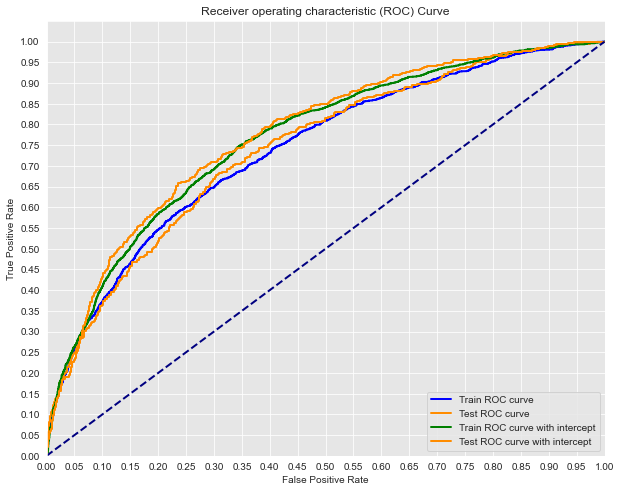

In [16]:
y_train_score = logreg.decision_function(X_train)
y_test_score = logreg.decision_function(X_test)

y_train_scorei = logregi.decision_function(X_train)
y_test_scorei = logregi.decision_function(X_test)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)

train_fpri, train_tpri, train_thresholdsi = roc_curve(y_train, y_train_scorei)
test_fpri, test_tpri, test_thresholdsi = roc_curve(y_test, y_test_scorei)

print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

print('Train AUC with intercept: {}'.format(auc(train_fpri, train_tpri)))
print('Test AUC with intercept: {}'.format(auc(test_fpri, test_tpri)))

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot(train_fpri, train_tpri, color='green',
         lw=lw, label='Train ROC curve with intercept')
plt.plot(test_fpri, test_tpri, color='darkorange',
         lw=lw, label='Test ROC curve with intercept')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The model with intercept is better.

In [17]:
print('----------------Train Set----------------')
print('Precision for train set: {}'.format(precision_score(y_train, y_hat_traini)))
print('Recall for train set: {}'.format(recall_score(y_train, y_hat_traini)))
print('Accuracy for train set: {}'.format(accuracy_score(y_train, y_hat_traini)))
print('F1 Score for train set: {}'.format(f1_score(y_train, y_hat_traini)))
print('----------------Test Set----------------')
print('Precision for test set: {}'.format(precision_score(y_test, y_hat_testi)))
print('Recall for test set: {}'.format(recall_score(y_test, y_hat_testi)))
print('Accuracy for test set: {}'.format(accuracy_score(y_test, y_hat_testi)))
print('F1 Score for test set: {}'.format(f1_score(y_test, y_hat_testi)))

----------------Train Set----------------
Precision for train set: 0.62
Recall for train set: 0.22142857142857142
Accuracy for train set: 0.8122666666666667
F1 Score for train set: 0.3263157894736842
----------------Test Set----------------
Precision for test set: 0.5414364640883977
Recall for test set: 0.19718309859154928
Accuracy for test set: 0.8072
F1 Score for test set: 0.2890855457227139


In [ ]:
"""training_precision = []
testing_precision = []
training_recall = []
testing_recall = []
training_accuracy = []
testing_accuracy = []
training_f1 = []
testing_f1 = []

for i in range(10, 95):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= i) # replace the "None" here
    logreg = LogisticRegression(fit_intercept=False, C=1e20, solver='liblinear')
    model_log = logreg.fit(X_train, y_train)
    y_hat_test = model_log.predict(X_test)
    y_hat_train = model_log.predict(X_train)
    
    # Your code here
    training_precision.append(precision_score(y_true=y_train, y_pred=y_hat_train))
    testing_precision.append(precision_score(y_true=y_test, y_pred=y_hat_test))
    training_recall.append(recall_score(y_true=y_train, y_pred=y_hat_train))
    testing_recall.append(recall_score(y_true=y_test, y_pred=y_hat_test))
    training_accuracy.append(accuracy_score(y_true=y_train, y_pred=y_hat_train))
    testing_accuracy.append(accuracy_score(y_true=y_test, y_pred=y_hat_test))
    training_f1.append(f1_score(y_true=y_train, y_pred=y_hat_train))
    testing_f1.append(f1_score(y_true=y_test, y_pred=y_hat_test))"""

In [ ]:
"""# Train and test F1 score
plt.scatter(list(range(10, 95)), training_f1, label='training_f1')
plt.scatter(list(range(10, 95)), testing_f1, label='testing_f1')
plt.legend()
plt.show()"""

# Fit a KNN model

In [25]:
from sklearn.neighbors import KNeighborsClassifier
class KNN():
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def _get_distances(self, x):
        distances = []
        for ind, val in enumerate(self.X_train):
            dist_to_i = euclidean(x, val)
            distances.append((ind, dist_to_i))
        return distances
    
    def _get_k_nearest(self, dists, k):
        sorted_dists = sorted(dists, key=lambda x: x[1])
        return sorted_dists[:k]
    
    def _get_label_prediction(self, k_nearest):
        labels = [self.y_train[i] for i, _ in k_nearest]
        counts = np.bincount(labels)
        return np.argmax(counts)
    
    def predict(self, X_test, k):
        preds = []
        # Iterate through each item in X_test
        for i in X_test:
            # Get distances between i and each item in X_train
            dists = self._get_distances(i)
            k_nearest = self._get_k_nearest(dists, k)
            predicted_label = self._get_label_prediction(k_nearest)
            preds.append(predicted_label)
        return preds

In [18]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifier
clf = KNeighborsClassifier()

# Fit the classifier
clf.fit(X_train, y_train)

# Predict on the test set
test_preds = clf.predict(X_test)

In [20]:
# Complete the function
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_preds)

Precision Score: 0.575187969924812
Recall Score: 0.30784708249496984
Accuracy Score: 0.8172
F1 Score: 0.4010484927916121


In [21]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [22]:
find_best_k(X_train, y_train, X_test, y_test)


Best Value for k: 1
F1-Score: 0.43907563025210083


In [26]:
knn = KNN()
knn.fit(X_train, y_train)

In [29]:
preds = knn.predict(X_test, 1)
print("Testing Accuracy: {}".format(accuracy_score(y_test, preds)))

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')